C:\Users\abhau\AppData\Local\Temp\ipykernel_13088\525326209.py:8: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv")


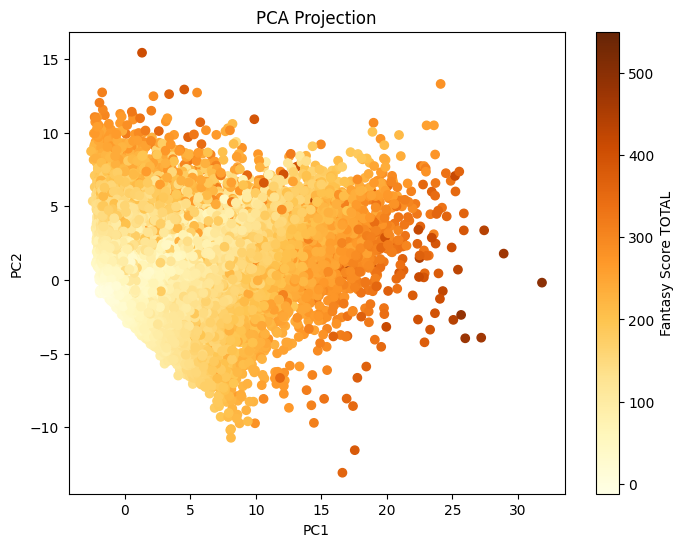

In [1]:
#PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv")

#REMOVING EMPTY COLUMNS
df = df.drop(columns=[
    'batting_style', 'bowling_style', 'full_name', 'playing_role',
    'key_cricinfo_3', 'key_cricketarchive_2', 'key_opta_2', 'key_crichq',
    'key_bcci_2', 'key_cricheroes', 'key_nvplay_2', 'key_cricinfo_2',
    'key_pulse_2', 'key_cricbuzz', 'key_opta', 'key_cricketworld',
    'key_cricingif', 'key_bcci', 'key_bigbash', 'key_nvplay',
    'key_pulse', 'key_cricketarchive', 'key_cricinfo'
])  

df['all_rounder_score'] = (df['runs_scored']/90 + df['wickets_taken']*0.35)*16
df['fielding'] = (df['catches_taken'] * 5 + df['run_out_throw'] * 15 +df['run_out_direct'] * 4)
df['impact']=(df['runs_scored']-df['balls_faced']+df['fours_scored']*2.5 +df['sixes_scored']*4)/90
df['impact2']=(df['wickets_taken']*3+df['dot_balls_as_bowler']*0.9-df['runs_conceded']*1.4)
#print(df.columns)

feature_cols = ['runs_scored', 'balls_faced', 'fours_scored', 'sixes_scored','dot_balls_as_batsman', 'fielding', 'impact','impact2',
                'wickets_taken','fantasy_score_batting','fantasy_score_bowling','fantasy_score_total']
     
df_model = df[feature_cols].dropna()  # Drop rows with missing data

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_model.drop('fantasy_score_total', axis=1) # Dropping fantasy score BATTING as we are predicting it from all other features
y = df_model['fantasy_score_total']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='YlOrBr')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.colorbar(label='Fantasy Score TOTAL')
plt.show()
